# Assignment 2
## Problem 2

In this exercise, the bias-variance tradeoff in machine learning will be examined. When training a regression model, it is necessary to determine the general formula beforehand. If a simple mathematical model (High bias-low variance) is chosen, it might not be able to capture the underlying relationship present in the dataset. On the other hand, choosing a complicated model (High variance-low bias) might yield good results on training data, but it runs the risk of overfitting and performing poorly on test data. The Dataset II consists of temperature sensor measurements. Based on this data set,

$$ Importing\ modules $$

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, RegressorMixin
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from tabulate import tabulate

$$ Loading\ the\ dataset$$

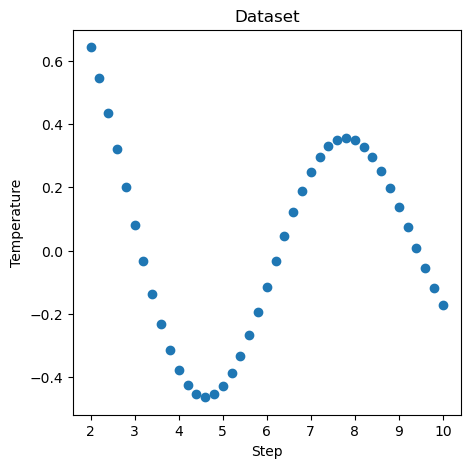

In [41]:
dataset = pd.read_csv('Dataset_II.csv', header=None).transpose().rename(columns={0:'Temperature', 1:'Step'})
train_data, test_data = train_test_split(dataset, test_size=0.2)
plt.figure(figsize=(5,5))
plt.scatter(dataset['Step'], dataset['Temperature'])
plt.title('Dataset')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.show()

$$Section\ A$$
a) Fit a regression model using the following mathematic formulas:

$$\ f_{(x)} = w_{(1)} + w_{(2)}x + w_{(3)}x^2$$ 

Mean Squared Error: 0.09666648624494101
Mean Absolute Error: 0.28789167307473645


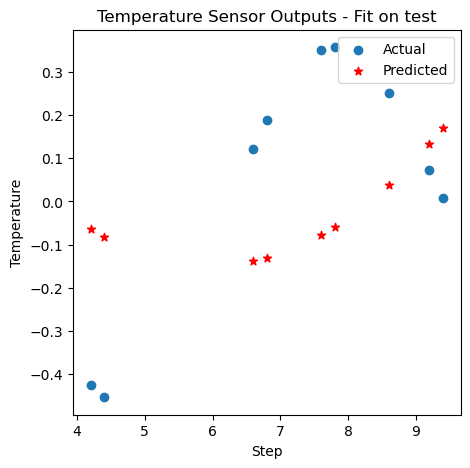

In [42]:
poly_model = PolynomialFeatures(degree=2, include_bias=True)
linear_model = LinearRegression()

X_train, Y_train = train_data['Step'], train_data['Temperature']
X_test, Y_test = test_data['Step'], test_data['Temperature']

poly_reg = make_pipeline(poly_model, linear_model)
poly_reg.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
Y_pred = poly_reg.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(Y_test, Y_pred.reshape(-1,))
mae = mean_absolute_error(Y_test, Y_pred.reshape(-1))
mse_1 = mse
mae_1 = mae

print("Mean Squared Error: " + str(mse))
print("Mean Absolute Error: " + str(mae))
# print("Coefficients: " + str(linear_model.coef_))
# print("Intercept: " + str(linear_model.intercept_))

plt.figure(figsize=(5,5))
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_pred.reshape(-1,), color='red', marker='*')
plt.title('Temperature Sensor Outputs - Fit on test')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.legend(['Actual', 'Predicted'])
plt.show()

**In order to fit the data using the given formula, a 2nd degree polynomial feature extractor and a linear regression function have been used to create a pipeline. In the next lines, the training and test data set have been created. Then the training data passed to the mentioned pipline to get fit. The trained model called "poly_reg", was applied to predict using the test dataset.**

**Mean Squared Error and Mean Absolute Error calculated and a scatter plot was illustrated.**

$$\ f_{(x)} = w_{(1)} + w_{(2)}x +...+ w_{(10)}x^9$$ 

Mean Squared Error: 1.4493008361903274e-09
Mean Absolute Error: 2.858400560129672e-05


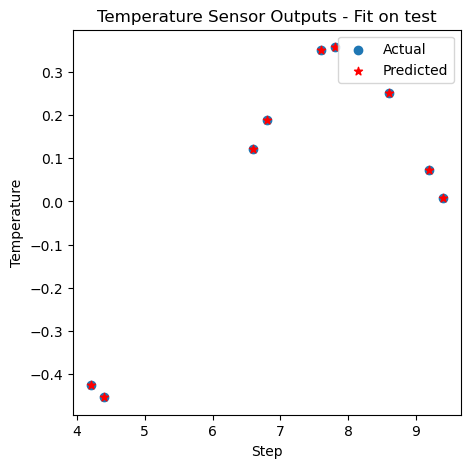

In [43]:
poly_model = PolynomialFeatures(degree=9, include_bias=True)
linear_model = LinearRegression()

poly_reg = make_pipeline(poly_model, linear_model)
poly_reg.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))

Y_pred = poly_reg.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(Y_test, Y_pred.reshape(-1,))
mae = mean_absolute_error(Y_test, Y_pred.reshape(-1))
mse_2 = mse
mae_2 = mae 

print("Mean Squared Error: " + str(mse))
print("Mean Absolute Error: " + str(mae))

plt.figure(figsize=(5,5))
plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_pred.reshape(-1,), color='red', marker='*')
plt.title('Temperature Sensor Outputs - Fit on test')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.legend(['Actual', 'Predicted'])
plt.show()

**In this section the degree of the polynomial features function changed to 9. The rest of the code is the same as in the previous section.**

$$\ f_{(x)} = w_{(1)} + w_{(2)}x + w_{(3)}sin(x) + w_{(4)}cos(x)$$ 

In [44]:
class CustomRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Custom fitting function 
        X = np.asarray(X)
        y = np.asarray(y)
        
        # X matrix 
        ones = np.ones((X.shape[0], 1))
        X_matrix = np.hstack((ones, X.reshape(-1, 1)))
        
        # adding sin(x) and cos(x) columns to the X matrix
        X_matrix = np.hstack((X_matrix, np.sin(X.reshape(-1, 1)), np.cos(X.reshape(-1, 1))))
        
        # calculating the coefficients using least squares
        self.coeffs = np.linalg.lstsq(X_matrix, y, rcond=None)[0]
    
    def predict(self, X):
        # Prediction function 
        X = np.asarray(X)
        
        # X matrix
        ones = np.ones((X.shape[0], 1))
        X_matrix = np.hstack((ones, X.reshape(-1, 1)))
        
        # adding sin(x) and cos(x) columns to the X matrix
        X_matrix = np.hstack((X_matrix, np.sin(X.reshape(-1, 1)), np.cos(X.reshape(-1, 1))))
        
        # predicting the output using the coefficients
        y_pred = np.dot(X_matrix, self.coeffs)

        return y_pred

**In order to fit the dataset using the given formula, we need to define new regressor function. In the previous section, this functions which is called "CustomRegressor" has been defined.**

Mean Squared Error: 0.0020669339806491925
Mean Absolute Error: 0.03935821806577308


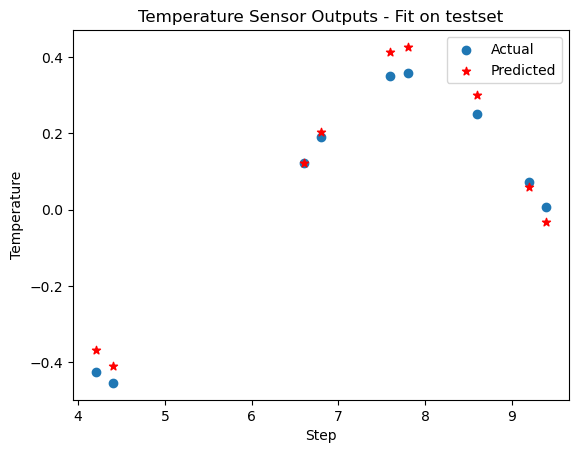

In [45]:
model = CustomRegressor()

X_train, Y_train = train_data['Step'], train_data['Temperature']
X_test, Y_test = test_data['Step'], test_data['Temperature']

model.fit(X_train.values.reshape(-1,1), Y_train.values.reshape(-1,1))
Y_pred = model.predict(X_test.values.reshape(-1,1))

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
mse_3 = mse 
mae_3 = mae 

print("Mean Squared Error: " + str(mse))
print("Mean Absolute Error: " + str(mae))

plt.scatter(X_test, Y_test)
plt.scatter(X_test, Y_pred, marker='*', color='red')
plt.title('Temperature Sensor Outputs - Fit on testset')
plt.xlabel('Step')
plt.ylabel('Temperature')
plt.legend(['Actual', 'Predicted'])
plt.figsize = (10, 20)
plt.show()

**The regressor function replaced with "CustomRegressor" and the test data has been predicted just like the previous sections.**

b) Evaluate the models using MSE and MAE. Tabulate the results. Look at which models performed better on this dataset and give your conclusion on the results.

In [46]:
table = [['Function','MSE','MAE'],
         ['2nd deg. Poly.', mse_1, mae_1],
         ['9th deg. Poly', mse_2, mae_2],
         ['Custom Poly.', mse_3, mae_3]]

print(tabulate(table, headers='firstrow', tablefmt='github'))

| Function       |        MSE |        MAE |
|----------------|------------|------------|
| 2nd deg. Poly. | 0.0966665  | 0.287892   |
| 9th deg. Poly  | 1.4493e-09 | 2.8584e-05 |
| Custom Poly.   | 0.00206693 | 0.0393582  |


**The Mean Squared Errors and Mean Absolute Errors calculated in the previous sections, are shown here. The 9th deg. Poly. and 2nd deg. Poly. regressor functions have the least and the most error respectively among the three models. However, the 9th deg. Poly. showed a good performance in terms of MSE and MAE, but it is worth noting that it suffers from high-bias issues which could lead to terrible predictions on new and unseen datasets. On the other hand, 2nd deg. Poly. the model had the worst predictions and could not satisfy expectations as a predictor model.**

**In conclusion the Custom model had relatively low error along with low bias which could be suitable as a predictor model.**